In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed = 50)

# Case 1: Random Mass Ratio; Random Aligned positive spins
# Case 2: Random Mass Ratio; Random Aligned negative spins
# Case 3: Random Mass Ratio; Spin1 positive, Spin2 negative
# Case 4: Random Mass Ratio; Spin1 negative, Spin2 positive

q = rng.integers(low = 1,high = 8,size = 4)
chi1 = rng.random(4)
chi1[1] *= -1
chi1[3] *= -1
chi2 = rng.random(4)
chi2[1] *= -1 
chi2[2] *= -1
pert = 1 + (2*rng.integers(low = 0,high = 2,size = 4) - 1)*(3*rng.random(4) + 1)*1e-10
m1 = q/(1 + q)
m2 = 1/(1 + q)

our_dynamics = []
trusted_dynamics = []
pert_dynamics = []
err_ours_trusted = []
err_pert_trusted = []

for k in range(4):
    pyseobnr_dynamics_label = "./pyseobnr_dynamics_q"+str(q[k])+"_chi1_"+str(int(10*chi1[k]))+"_chi2"+str(int(10*chi2[k]))+".dat"
    pyseobnrpert_dynamics_label = "./pyseobnrpertO14_dynamics_q"+str(q[k])+"_chi1_"+str(int(10*chi1[k]))+"_chi2"+str(int(10*chi2[k]))+".dat"
    our_dynamics_label = "./our_dynamics_q"+str(q[k])+"_chi1_"+str(int(10*chi1[k]))+"_chi2"+str(int(10*chi2[k]))+".dat"
    err_trustedpert_label = "./err_trusted_pert_q"+str(q[k])+"_chi1_"+str(int(10*chi1[k]))+"_chi2"+str(int(10*chi2[k]))+".dat"
    err_trustedours_label = "./err_trusted_ours_q"+str(q[k])+"_chi1_"+str(int(10*chi1[k]))+"_chi2"+str(int(10*chi2[k]))+".dat"
    
    trusted_single_set = np.loadtxt(pyseobnr_dynamics_label)
    pert_single_set = np.loadtxt(pyseobnrpert_dynamics_label)
    our_single_set = np.loadtxt(our_dynamics_label)
    errtrustedpert_single_set = np.loadtxt(err_trustedpert_label)
    errtrustedours_single_set = np.loadtxt(err_trustedours_label)
    
    our_dynamics.append(trusted_single_set)
    trusted_dynamics.append(pert_single_set)
    pert_dynamics.append(our_single_set)
    err_ours_trusted.append(errtrustedpert_single_set)
    err_pert_trusted.append(errtrustedours_single_set)

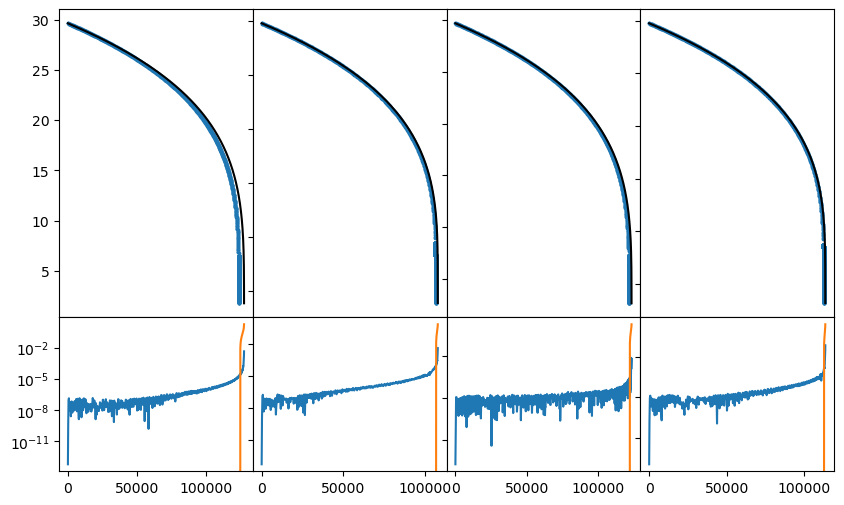

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

idx_to_plot = 1

# Create a figure and a grid specification with unequal row heights
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(2, 4, height_ratios=[2, 1], figure=fig)

# Loop over the grid and create subplots
axs = []
for i in range(2):
    for j in range(4):
        ax = fig.add_subplot(gs[i, j])
        axs.append(ax)

        # Apply log scale for the y-axis on the bottom row
        if i == 1:
            ax.set_yscale('log')

        # Only show x-axis labels on the bottom row subplots
        if i == 0:
            ax.tick_params(labelbottom=False)
        # Only show y-axis labels on the left-most column subplots
        if j > 0:
            ax.tick_params(labelleft=False)

        if i == 0:
            ax.plot(trusted_dynamics[j][:,0],trusted_dynamics[j][:,idx_to_plot], label = 'trusted',color = 'black')
            ax.scatter(our_dynamics[j][:,0],our_dynamics[j][:,idx_to_plot], label = 'ours',s = (1./76.)**(-0.25))
        if i == 1:
            ax.plot(err_pert_trusted[j][:,0],err_pert_trusted[j][:,idx_to_plot],label = 'err(trusted,pert)')
            ax.plot(err_ours_trusted[j][:,0],err_ours_trusted[j][:,idx_to_plot],label = 'err(trusted,ours)')
    
    
# Remove the space between subplots
plt.subplots_adjust(wspace=0, hspace=0)

# Show the plot
plt.show()

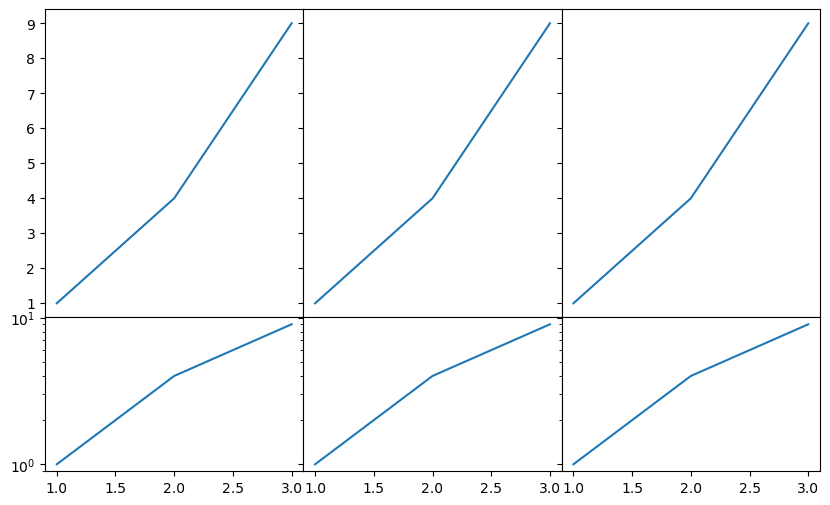

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a figure and a grid specification with unequal row heights
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(2, 3, height_ratios=[2, 1], figure=fig)

# Loop over the grid and create subplots
axs = []
for i in range(2):
    for j in range(3):
        ax = fig.add_subplot(gs[i, j])
        axs.append(ax)

        # Apply log scale for the y-axis on the bottom row
        if i == 1:
            ax.set_yscale('log')

        # Only show x-axis labels on the bottom row subplots
        if i == 0:
            ax.tick_params(labelbottom=False)
        # Only show y-axis labels on the left-most column subplots
        if j > 0:
            ax.tick_params(labelleft=False)

        # Plot some dummy data
        ax.plot([1, 2, 3], [1, 4, 9])

# Remove the space between subplots
plt.subplots_adjust(wspace=0, hspace=0)

# Show the plot
plt.show()

In [4]:
# Case 3

In [5]:
# Case 4

In [6]:
plt.scatter(dynamics_ours[:,0],dynamics_ours[:,2],color = "black",s = (1./72.)**-0.25,label = 'ours')
plt.plot(dynamics_pyseobnr[:,0],dynamics_pyseobnr[:,2],label = 'pyseobnr')
plt.xlabel(r'$t(M)$')
plt.ylabel(r'$\phi$')
plt.legend()
plt.savefig('phi_comparison_q2_chi1_2_chi2_1.png',dpi = 200)

NameError: name 'dynamics_ours' is not defined

In [ ]:
plt.scatter(dynamics_ours[:,0],dynamics_ours[:,3],color = "black",s = (1./72.)**-0.25, label = 'ours')
plt.plot(dynamics_pyseobnr[:,0],dynamics_pyseobnr[:,3], label = 'pyseobnr')
plt.xlabel(r'$t(M)$')
plt.ylabel(r'$p_{r_*}(\mu)$')
plt.legend()
plt.savefig('prstar_comparison_q2_chi1_2_chi2_1.png',dpi = 200)

In [ ]:
plt.scatter(dynamics_ours[:,0],dynamics_ours[:,4],color = "black",s = (1./72.)**-0.25,label = 'ours')
plt.plot(dynamics_pyseobnr[:,0],dynamics_pyseobnr[:,4], label = 'pyseobnr')
plt.xlabel(r'$t(M)$')
plt.ylabel(r'$p_{\phi}(M\mu)$')
plt.legend()
plt.savefig('pphi_comparison_q2_chi1_2_chi2_1.png',dpi = 200)

In [ ]:
plt.plot(np.real(wf_ours[:,0] + wf_pyseobnr[0,0]),np.real(wf_ours[:,1]),color = "black",label = 'ours')
plt.plot(np.real(wf_pyseobnr[:,0]),np.real(wf_pyseobnr[:,1]),label = 'pyseobnr')
plt.xlabel(r'$t(M)$')
plt.ylabel(r'$h_{+}$')
plt.xlim(np.real(wf_pyseobnr[-1,0])-2000,np.real(wf_pyseobnr[-1,0]))
plt.legend()
plt.savefig('real_strain_comparison_q2_chi1_2_chi2_1.png',dpi = 200)

In [ ]:
plt.plot(np.real(wf_ours[:,0] + wf_pyseobnr[0,0]),np.abs(wf_ours[:,1]),color = "black",label = 'ours')
plt.plot(np.real(wf_pyseobnr[:,0]),np.abs(wf_pyseobnr[:,1]),label = 'pyseobnr')
plt.xlabel(r'$t(M)$')
plt.ylabel(r'$h$')
plt.xlim(np.real(wf_pyseobnr[-1,0])-2000,np.real(wf_pyseobnr[-1,0]))
plt.legend()
plt.savefig('amplitude_strain_comparison_q2_chi1_2_chi2_1.png',dpi = 200)

In [ ]:
plt.plot(np.real(wf_ours[:,0] + wf_pyseobnr[0,0]),-np.unwrap(np.arctan2(np.imag(wf_ours[:,1]),np.real(wf_ours[:,1]))),color = "black",label = 'ours')
plt.plot(np.real(wf_pyseobnr[:,0]),-np.unwrap(np.arctan2(np.imag(wf_pyseobnr[:,1]),np.real(wf_pyseobnr[:,1]))),label = 'pyseobnr')
plt.xlabel(r'$t(M)$')
plt.ylabel(r'$\varphi$')
plt.xlim(np.real(wf_pyseobnr[-1,0])-2000,np.real(wf_pyseobnr[-1,0]))
plt.legend()
plt.savefig('phase_comparison_q2_chi1_2_chi2_1.png',dpi = 200)